<a href="https://colab.research.google.com/github/chodisettihenry/Labpractice/blob/main/HENRY_MINOR_PROJECT_DIGIT_RECOGINER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  # NAME:CHODISETTY MATHEW HENRY
  # GMAIL:chodisettisatish2248@gmail.com




# PROJECT NAME:Artificial Intelligence October Minor Project

# MINOR PROJECT SUBJECT:
The goal of this project is to create a model that will be able to recognize and
determine the handwritten digits from its image by using the concepts of Artificial
Neural Network.
Perform a digit classification to correctly identify digits from a dataset of tens of
thousands of handwritten images from the MNIST dataset from keras.
MNIST database of handwritten digits is used as dataset. It consists of a training set of

60,000 examples, and a test set of 10,000 examples. The digits have been size-
normalized and centered in a fixed-size image of 28*28 pixels (784 pixels).

# Explore MNIST Dataset from Keras

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
%matplotlib inline

5


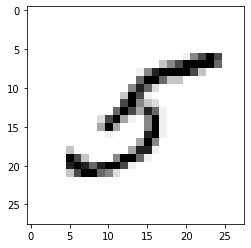

In [4]:
import matplotlib.pyplot as plt

image_index = 35
print(y_train[image_index])
plt.imshow(X_train[image_index], cmap='Greys')
plt.show()

In [5]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
print(y_train[:image_index + 1])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5]


# Cleaning Data

In [7]:
# save input image dimensions
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)



In [8]:
num_classes = 10


#Design a Model

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
     activation='relu',
     input_shape=(img_rows, img_cols, 1)))

In [10]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile and Train Model

In [14]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [15]:
batch_size = 128
epochs = 10

model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
model.save("test_model.h5")

Epoch 1/10
469/469 [==============================] - 149s 315ms/step - loss: 0.7520 - accuracy: 0.8736 - val_loss: 0.0660 - val_accuracy: 0.9806
Epoch 2/10
469/469 [==============================] - 148s 316ms/step - loss: 0.1576 - accuracy: 0.9535 - val_loss: 0.0551 - val_accuracy: 0.9823
Epoch 3/10
469/469 [==============================] - 147s 313ms/step - loss: 0.1190 - accuracy: 0.9650 - val_loss: 0.0492 - val_accuracy: 0.9846
Epoch 4/10
469/469 [==============================] - 147s 313ms/step - loss: 0.0953 - accuracy: 0.9718 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 147s 313ms/step - loss: 0.0836 - accuracy: 0.9750 - val_loss: 0.0420 - val_accuracy: 0.9866
Epoch 6/10
469/469 [==============================] - 146s 312ms/step - loss: 0.0711 - accuracy: 0.9786 - val_loss: 0.0482 - val_accuracy: 0.9858
Epoch 7/10
469/469 [==============================] - 148s 315ms/step - loss: 0.0660 - accuracy: 0.9801 - val_loss: 0.0373 -

# Test with Handwritten Digits

In [16]:
import imageio
import numpy as np
from matplotlib import pyplot as plt

im = imageio.imread("https://i.imgur.com/a3Rql9C.png")

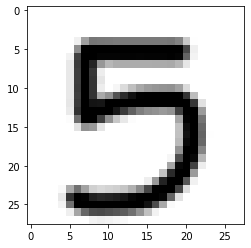

In [17]:
gray = np.dot(im[...,:3], [0.299, 0.587, 0.114])
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [30]:
# reshape the image
gray = gray.reshape(1, img_rows, img_cols, -1)

# normalize image
gray /= 255

# output

In [31]:
# load the modelss
from keras.models import load_model
model = load_model("test_model.h5")

# predict digit
prediction = model.predict(gray)
print(prediction.argmax())

8
